# Test degli strumenti

**Informazioni generali.** Misura del coefficiente di partizione di una serie di resistori

Dettagli del setup:
* rete di divisione tensione assemblata su breadboard
* acquisizione dati tramite AD2 e codice python( dataAcquisition.py)


Si e' iniziato testando le capacita' e le funzionalita' dell'AD2 e della libreria python tdwf tramite i codici ad2test.py e dataTest.py.

Successivamente sono state effettuate misure e analisi primaria dei dati tramite dataAcquisition.py e le misure sono state salvate in files secondo lo standard e i parametri riportati di seguito.

La prima colonna contiene il tempo dell'acquisizione, seconda il valore misurato dallo scope in canale A, terza canale B.

<center>

| Misura | Amplitude[V] | Range[V] | waveform |
| :-: | :-: | :-: | :-: |
| 001 | 2 | 5 | sin |
| 002 | 1 | 5 | sin |
| 003 | 0.5 | 5 | sin |
| 004 | 1 | 2 | sin |
| 005 | 2 | 6 | sin |
| 006 | 2 | 5 | DC |
| 007 | 2 | 6 | DC |

</center>

## Analisi della distribuzione dei dati

Osservando i set di dati data006 e data007, ossia quelli ottenuti da misure DC, si puo' osservare una distribuzione statistica delle tensioni, le quali non sono esattamente in ingresso i 2V impostati, ma variano attorno questo valore.

Plottando istogrammi delle misure prese su scale diserve è facile notare due effetti principali, il primo  la variazione della larghezza delle distribuzioni, dovuta a una minore accuratezza di misura del dispositivo nel range di misura più esteso, dovuta probabilmente a una variazione della dimensione degli intervalli di digitalizzazione.

Il secondo effetto è invece lo shift del valore medio delle distribuzioni, in particolare in ambo le misure( vin e vout) la media della distribuzione a misura narrow risulta maggiore( rispettivamente di 16mV e 24mV per le due misure), effetto che si crede possa essere dovuto a una mancanza di calibrazione di una delle due scale.
Si ritiene questo il motivo più probabile in quanto le impostazioni del generatore di forme d'onda non sono state modificate tra le due lettore, conseguentemente si ritiene l'errore essere presente solo nella pipeline di misura.


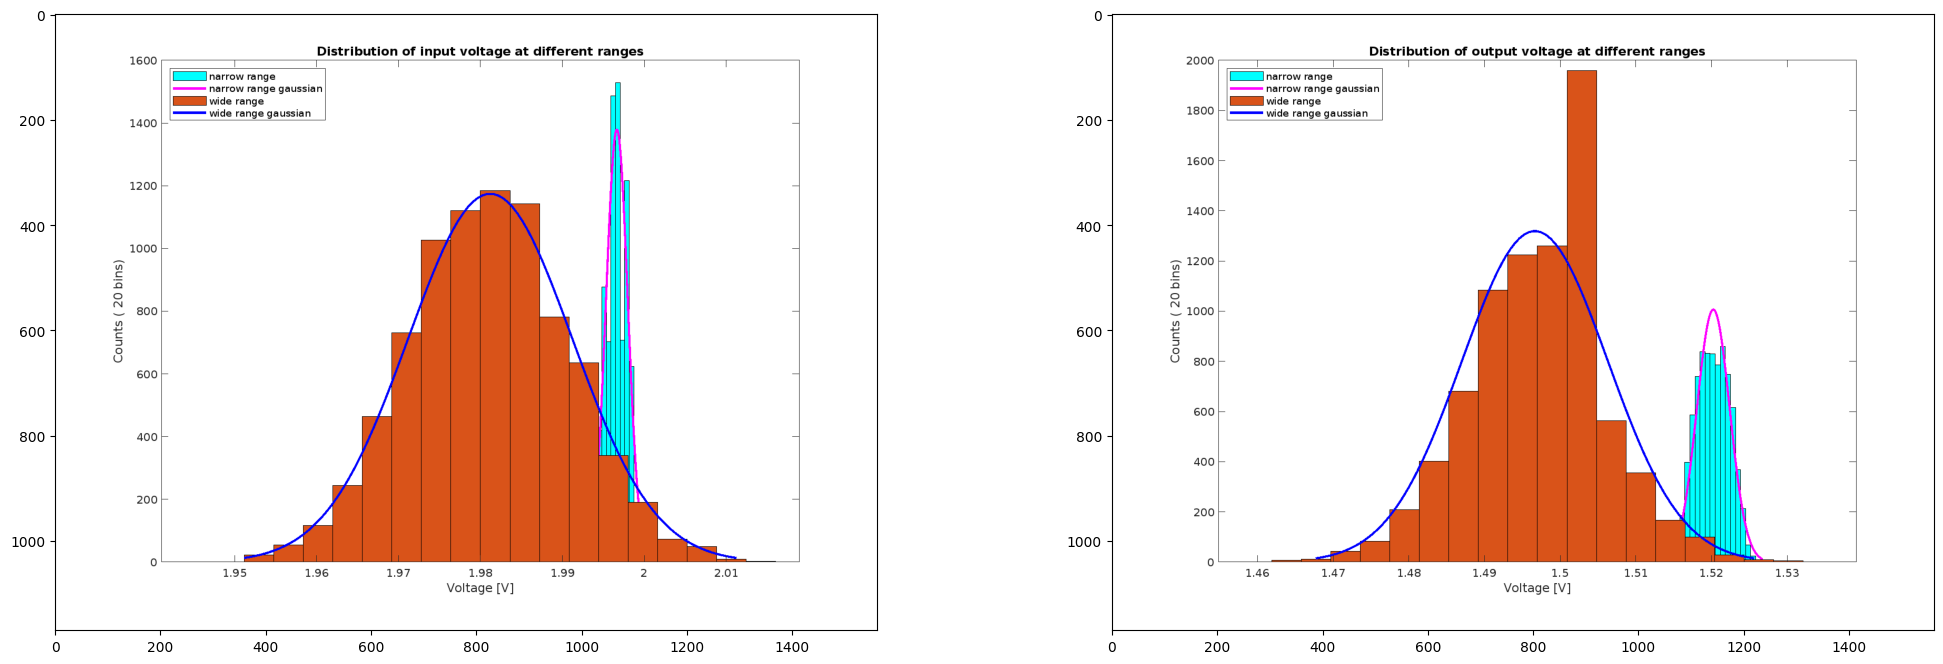

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 25 ,8

# read images
img_A = mpimg.imread('Media/vvaDistPlot.png')
img_B = mpimg.imread('Media/vvbDistPlot.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)

I risultati dei fit Gaussiani sono riportati di seguito

<center>

| Misura | $ \mu $ | $ \sigma^2 $ |
| :-: | :-: | :-: |
| Vi - nr | 1.9966 | 0.0013 |
| Vi - wr | 1.9811 | 0.0100 |
| Vo - nr | 1.5202 | 0.0021 |
| Vo - wr | 1.4966 | 0.0096 |

</center>

## Misura del coefficiente di partizione

Tramite le misure effettuate precedentemente, assumendo che l'incertezza di misura su misure statiche sia la stessa presente su misure dinamiche, si può effettuare un fit della presa dati 001 con due funzioni della forma $$ f(t) = A \cdot sin( \omega  t + \phi) + off $$ con parametri liberi l'ampiezza, la pulsazione, la fase  e un eventuale offset e considerando come errore sulle misure lo stesso sigma ottenuto dalla misura Vi con range stretto.

I fit sono riportati di seguito.

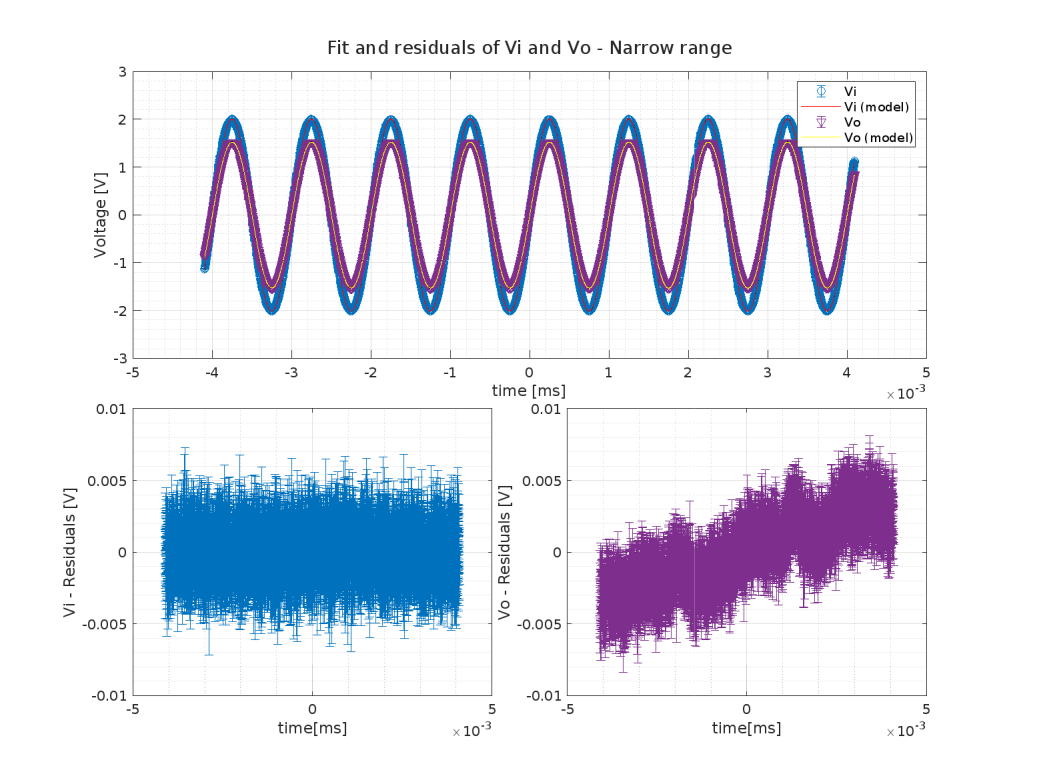

In [20]:
from IPython.core.display import SVG
SVG(filename='Media/fitPlot.svg')

Inoltre si hanno valori di $k^2_{red} = 1.44$ e  $k^2_{red} = 3.34 $ rispettivamente per il fit dei valori Vi e Vo, entrambi con valore aspettato $k^2_{red} \approx 1 \pm 0.02$, dato il numero di gradi di libertà presenti.

Mentre per il primo dei fit si pensa che il valore ottenuto sia non compatibile con quello teorico a causa di una sottoestimazione dei valori dell'errore, dovuta all'assunzione che le distribuzione di lettura dinamica e statica siano eguali, per il secondo fit appare ovvia la presenza di strutture non banali dei residui, facendo pensare alla presenza di effetti secondari dei quali non è stato tenuto conto, come ad esempio una capacità parassita, ipotesi rafforzata dalla presenza di parametri di fase non compatibili tra i due fit.

Il valore del coefficiente di partizione può poi essere calcolato tramite divisione deelle ampiezze post-fit, ottenute eguali a $ Vi = 2.0045 \pm 1.46 \cdot 10^{-5} $ e $ Vo = 1.5251 /pm 3.75 \cdot 10^{-5} $, con dunque rapporto $ G_f = \frac{Vo}{Vi} = 0.7601 \pm 1.95 \cdot 10^{-5} $, i valori impossibilmente bassi delle incertezze sempre dovuti agli errori nei fit di cui specificato sopra.

Paragonando tale valore con quello ottenibile tramite modello dei resistori, i quali, misurati tramite Multimetro BK393, valgono $ R_1 = 33.056 \pm 0.109 \, k\Omega $ e $ R_2 = 9.977 \pm 0.040 \, k\Omega $ e, ottenendo il rapporto di partizione da $ G_R = \frac{R_1}{R_1+R_2} = 0.768 \pm 0.001$ si ottengono due valori incompatibili, si crede che questo sia dovuto ai problemi nei fit.

Questa idea è rafforzata dal fatto che, calcolando il rapporto con medie e varianze ottenute dalle prese dati statiche, si ottiene un $G_s = \frac{1.996 \pm 0.036}{1.520 \pm 0.045} = 0.761 \pm 0.027 $, compatibile con sia il valore teorico che quello fittato.

## Risultati

I valori dei diversi coeficienti di partizione alcuni compatibili, altri no, fa pensare che la maggior parte degli errori effettuatisi siano stati durante la procedura di fit, difatti i risultati migliori sono quelli che non contengono alcun fit( a  meno di quello a Gaussiana), facendo credere che fossero sbagliate le assunzioni di eguaglianza tra incertezze statiche e dinamiche oppure che il modello di semplice rapporto fosse scorretto e si dovesse tenere in considerazione anche fluttuazioni secondatie dovute a effetti parassiti.